In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:

df = pd.read_csv("stock_prices.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)


df.head()


,Open,Close,Volume
Date,,,
2022-01-01,100.99,100.80,7279
2022-01-02,99.66,100.64,9553
2022-01-03,102.07,101.66,8353
2022-01-04,102.29,103.99,4727
2022-01-05,104.72,103.69,7272


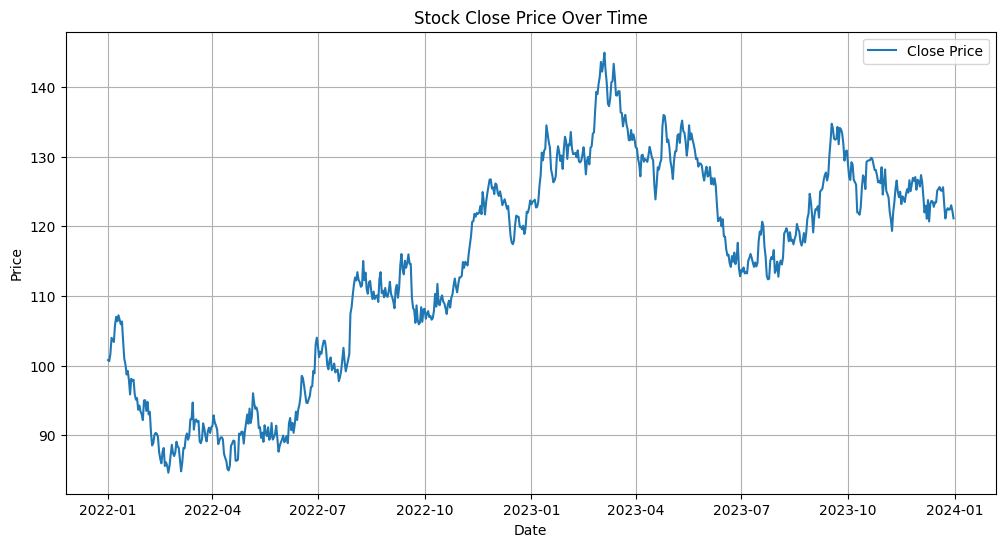

In [5]:

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [6]:

df['Close_lag1'] = df['Close'].shift(1)


df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()


df.dropna(inplace=True)
df.head()


,Open,Close,Volume,Close_lag1,MA_7,MA_30
Date,,,,,,
2022-01-30,93.73,93.03,2778,93.42,94.388571,100.349333
2022-01-31,91.61,92.18,8902,93.03,93.858571,100.062000
2022-02-01,95.13,95.01,6110,92.18,93.842857,99.874333
2022-02-02,97.60,95.04,6189,95.01,93.801429,99.653667
2022-02-03,93.41,93.50,8378,95.04,93.778571,99.304000


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Train-test split
train = df['Close'][:int(0.8*len(df))]
test = df['Close'][int(0.8*len(df)):]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))


C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\mitha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


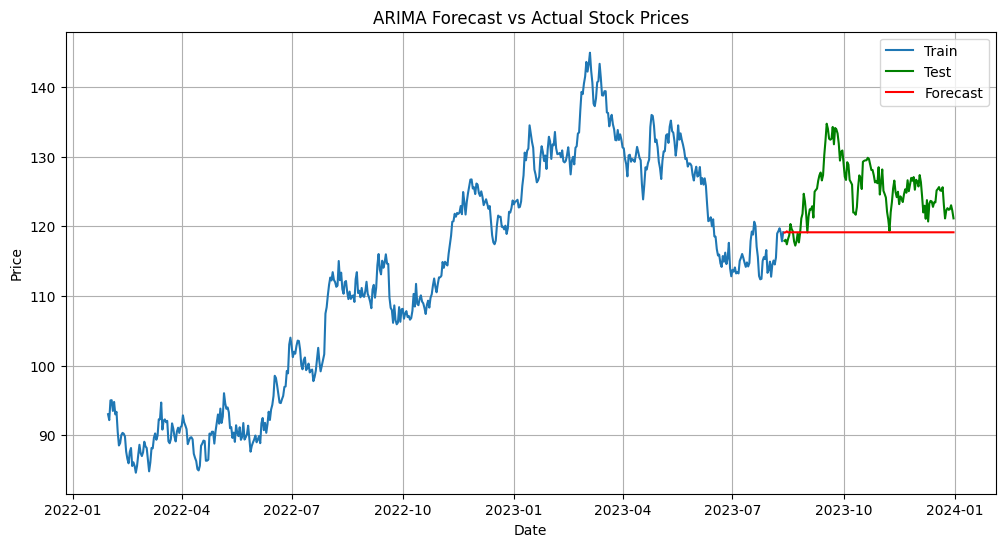

In [8]:
# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 7.17
MAE: 6.13
